In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df= pd.read_csv(r"C:\Users\Sidhanth\Downloads\aerofit_treadmill.csv")

Objective: To understand the customer profile for each treadmill product (KP281, KP481, KP781) based on demographics and behavior. This will help in better recommendations to future customers and improving product marketing.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [19]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [14]:
df.shape

(180, 9)

In [17]:
print(df['Age'].describe())

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64


In [5]:
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Product'] = df['Product'].astype('category')

print(df.describe(include='all'))


       Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
uni

In [21]:
print("Description for Education"," ",df['Education'].describe())
print("Description for Usage",df['Usage'].describe())
print("Description for Fitness",df['Fitness'].describe())
print("Description for Income",df['Income'].describe())
print("Description for Miles",df['Miles'].describe())

Description for Education   count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64
Description for Usage count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64
Description for Fitness count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64
Description for Income count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64
Description for Miles count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.00000

In [7]:

categorical_cols = df.select_dtypes(include='object').columns.tolist()


for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    print(df[col].value_counts())
    print("\n")


In [8]:
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Attribute', 'Unique_Values']
print(unique_counts)

       Attribute  Unique_Values
0        Product              3
1            Age             32
2         Gender              2
3      Education              8
4  MaritalStatus              2
5          Usage              6
6        Fitness              5
7         Income             62
8          Miles             37


Text(0.5, 1.0, 'Age distribution')

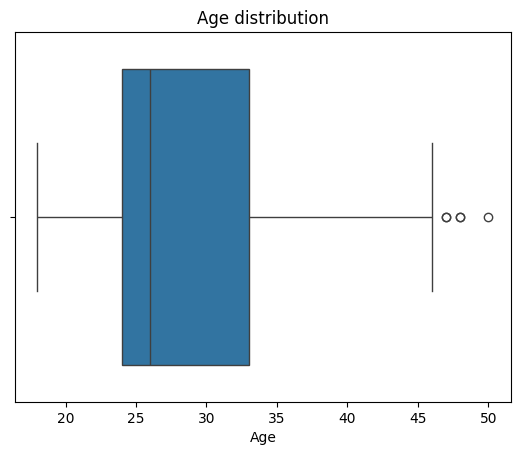

In [27]:
sns.boxplot(x=df['Age'])
plt.title('Age distribution')

Text(0.5, 1.0, 'Usage distribution')

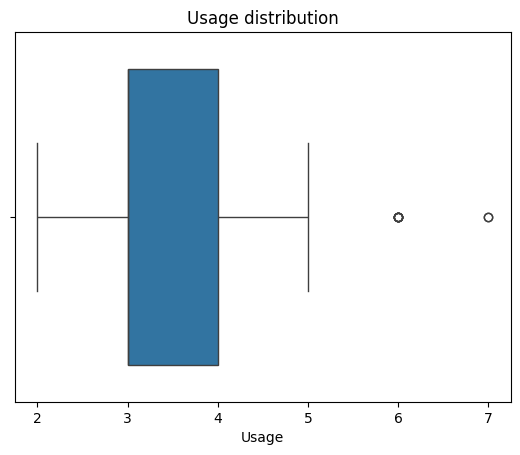

In [28]:
sns.boxplot(x=df['Usage'])
plt.title('Usage distribution')

Text(0.5, 1.0, 'Fitness distribution')

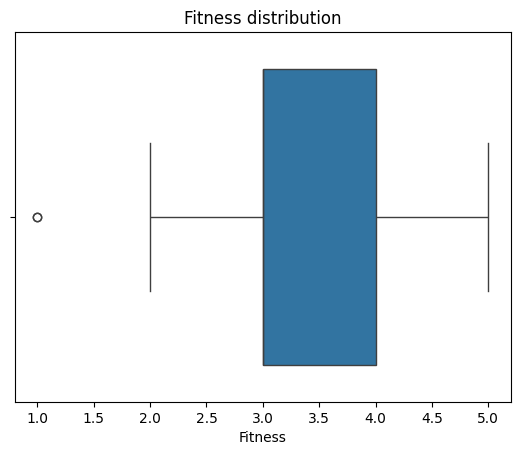

In [29]:
sns.boxplot(x=df['Fitness'])
plt.title('Fitness distribution')

Text(0.5, 1.0, 'Income distribution')

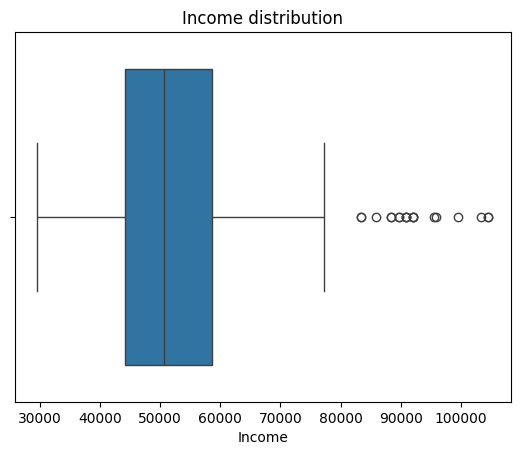

In [6]:
sns.boxplot(x=df['Income'])
plt.title('Income distribution')

For income we see a high outliers above 80k income hence we need to transfor it

In [13]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

In [14]:
df['Income_Capped'] = cap_outliers(df['Income'])

Text(0.5, 1.0, 'Income distribution')

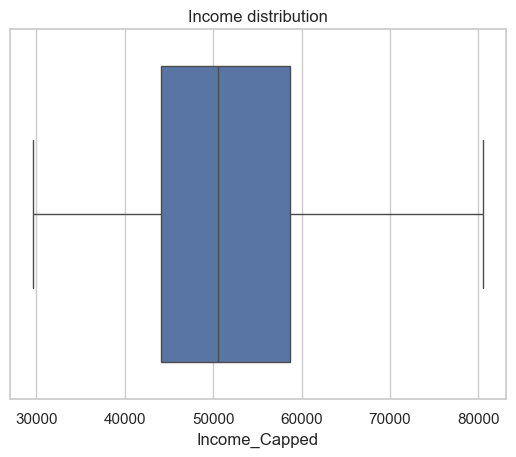

In [19]:
sns.boxplot(x=df['Income_Capped'])
plt.title('Income distribution')

Text(0.5, 1.0, 'Miles distribution')

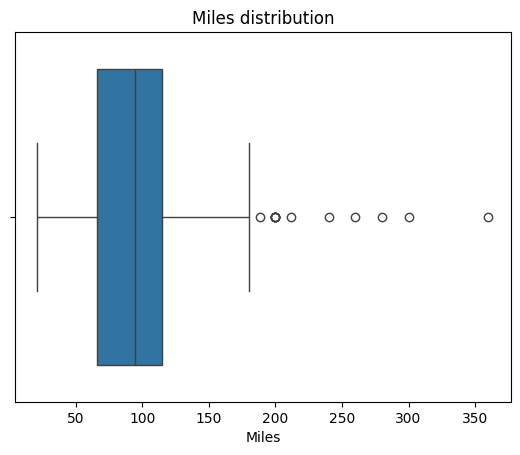

In [31]:
sns.boxplot(x=df['Miles'])
plt.title('Miles distribution')

In miles we see high outliers above 200 which needs to be treated

In [16]:
df['Miles_Capped'] = cap_outliers(df['Miles'])

Text(0.5, 1.0, 'Miles distribution')

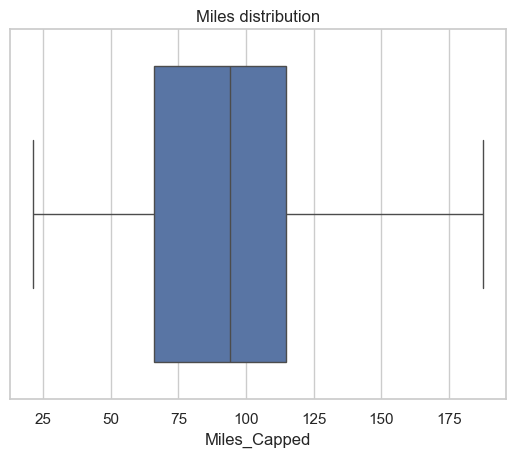

In [20]:
sns.boxplot(x=df['Miles_Capped'])
plt.title('Miles distribution')

Text(0.5, 1.0, 'Product Purchased by Marital Status')

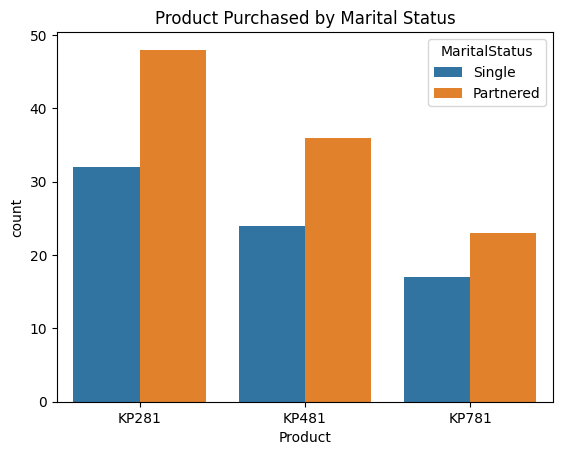

In [37]:
sns.countplot(data= df, x='Product', hue='MaritalStatus')
plt.title('Product Purchased by Marital Status')

From above graph we can witness that all products has higher demands in partnered compared to singles

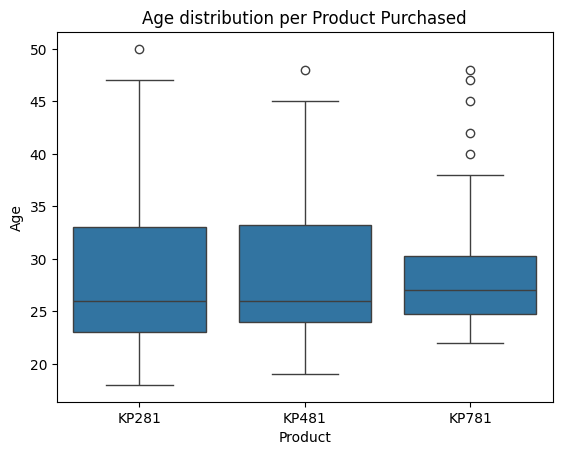

In [38]:
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Age distribution per Product Purchased')
plt.show()

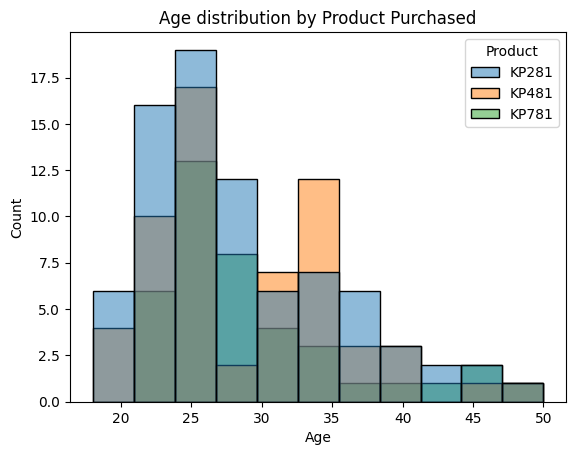

In [42]:
sns.histplot(data=df, x='Age', hue='Product')
plt.title('Age distribution by Product Purchased')
plt.show()

From above graph we can observe that -


1. KP281 Treadmill Peaks around 22 to 30 years old.

Most frequently purchased treadmill among younger buyers.

Consistent buyer base from early 20s to early 30s, with some interest even beyond 35.

Insight:
Likely attracts students, young professionals, or first-time treadmill buyers who are more price-sensitive or just beginning their fitness journey.



2. KP481 Treadmill has highest density around 30 to 35 years.

Noticeably fewer purchases by customers under 25.

Slightly older demographic than KP281.

Insight:
Appeals to a more mature audience, possibly people who have stable incomes and want a balance between features and price. Ideal for working professionals or couples who have fitness as a consistent part of their routine.



3. KP781 Treadmill has broad age range from 23 to mid-30s, but concentrated near 25 to 28 years.

Less popular in extreme age groups (under 22 or above 40).

Insight:
The KP781 attracts serious fitness enthusiasts, likely younger professionals or tech-savvy users who want high-end features. Buyers are willing to invest more for performance or advanced tracking.

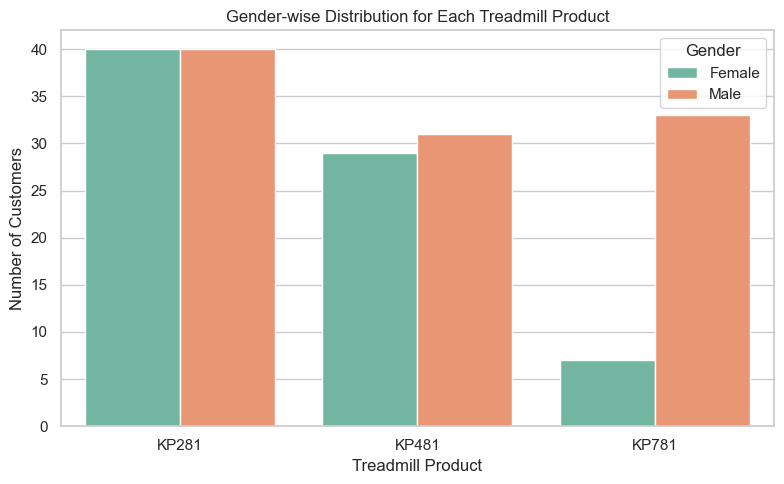

In [9]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product', hue='Gender', palette='Set2')


plt.title('Gender-wise Distribution for Each Treadmill Product')
plt.xlabel('Treadmill Product')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

From above graph we can observe that KP281 and KP481 has no much difference in sales with respet to gender, where as for KP781 we can see that Male customers are significanty high

In [6]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [20]:
marginal_probability= (df['Product'].value_counts()*100/len(df)).reset_index()
marginal_probability.columns = ['Product Name', 'Marginal Probability in percent']
print (marginal_probability)

  Product Name  Marginal Probability in percent
0        KP281                        44.444444
1        KP481                        33.333333
2        KP781                        22.222222


Text(0.5, 1.0, 'Correlation table')

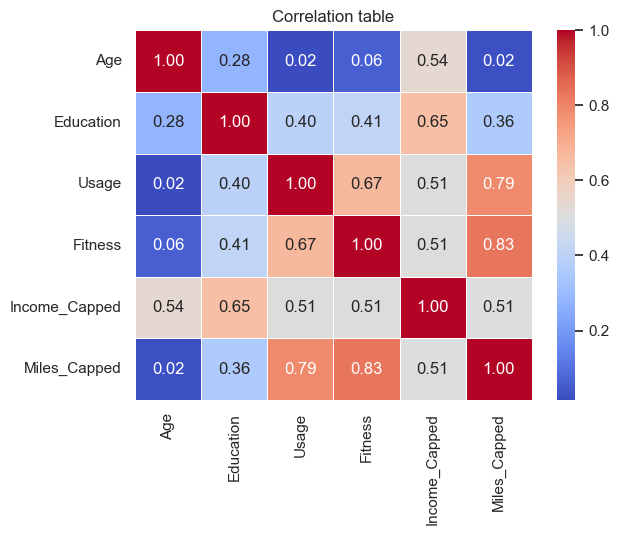

In [21]:
correlation  = df[['Age','Education','Usage','Fitness', 'Income_Capped', 'Miles_Capped']].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation table')

Interpretations based on correlation

i) Since Fitness, Income, and Usage are tightly correlated, KP781 buyers are likely to be highly fit and wealthier customers who plan to use the treadmill regularly.
ii) Moderate correlations between Fitness, Miles, and Usage show that a mid-tier segment (KP481) is ideal for people building consistency.
iii) Weak correlation between Age and Usage/Fitness implies that younger or older users are not necessarily using the treadmill more or being more fit.

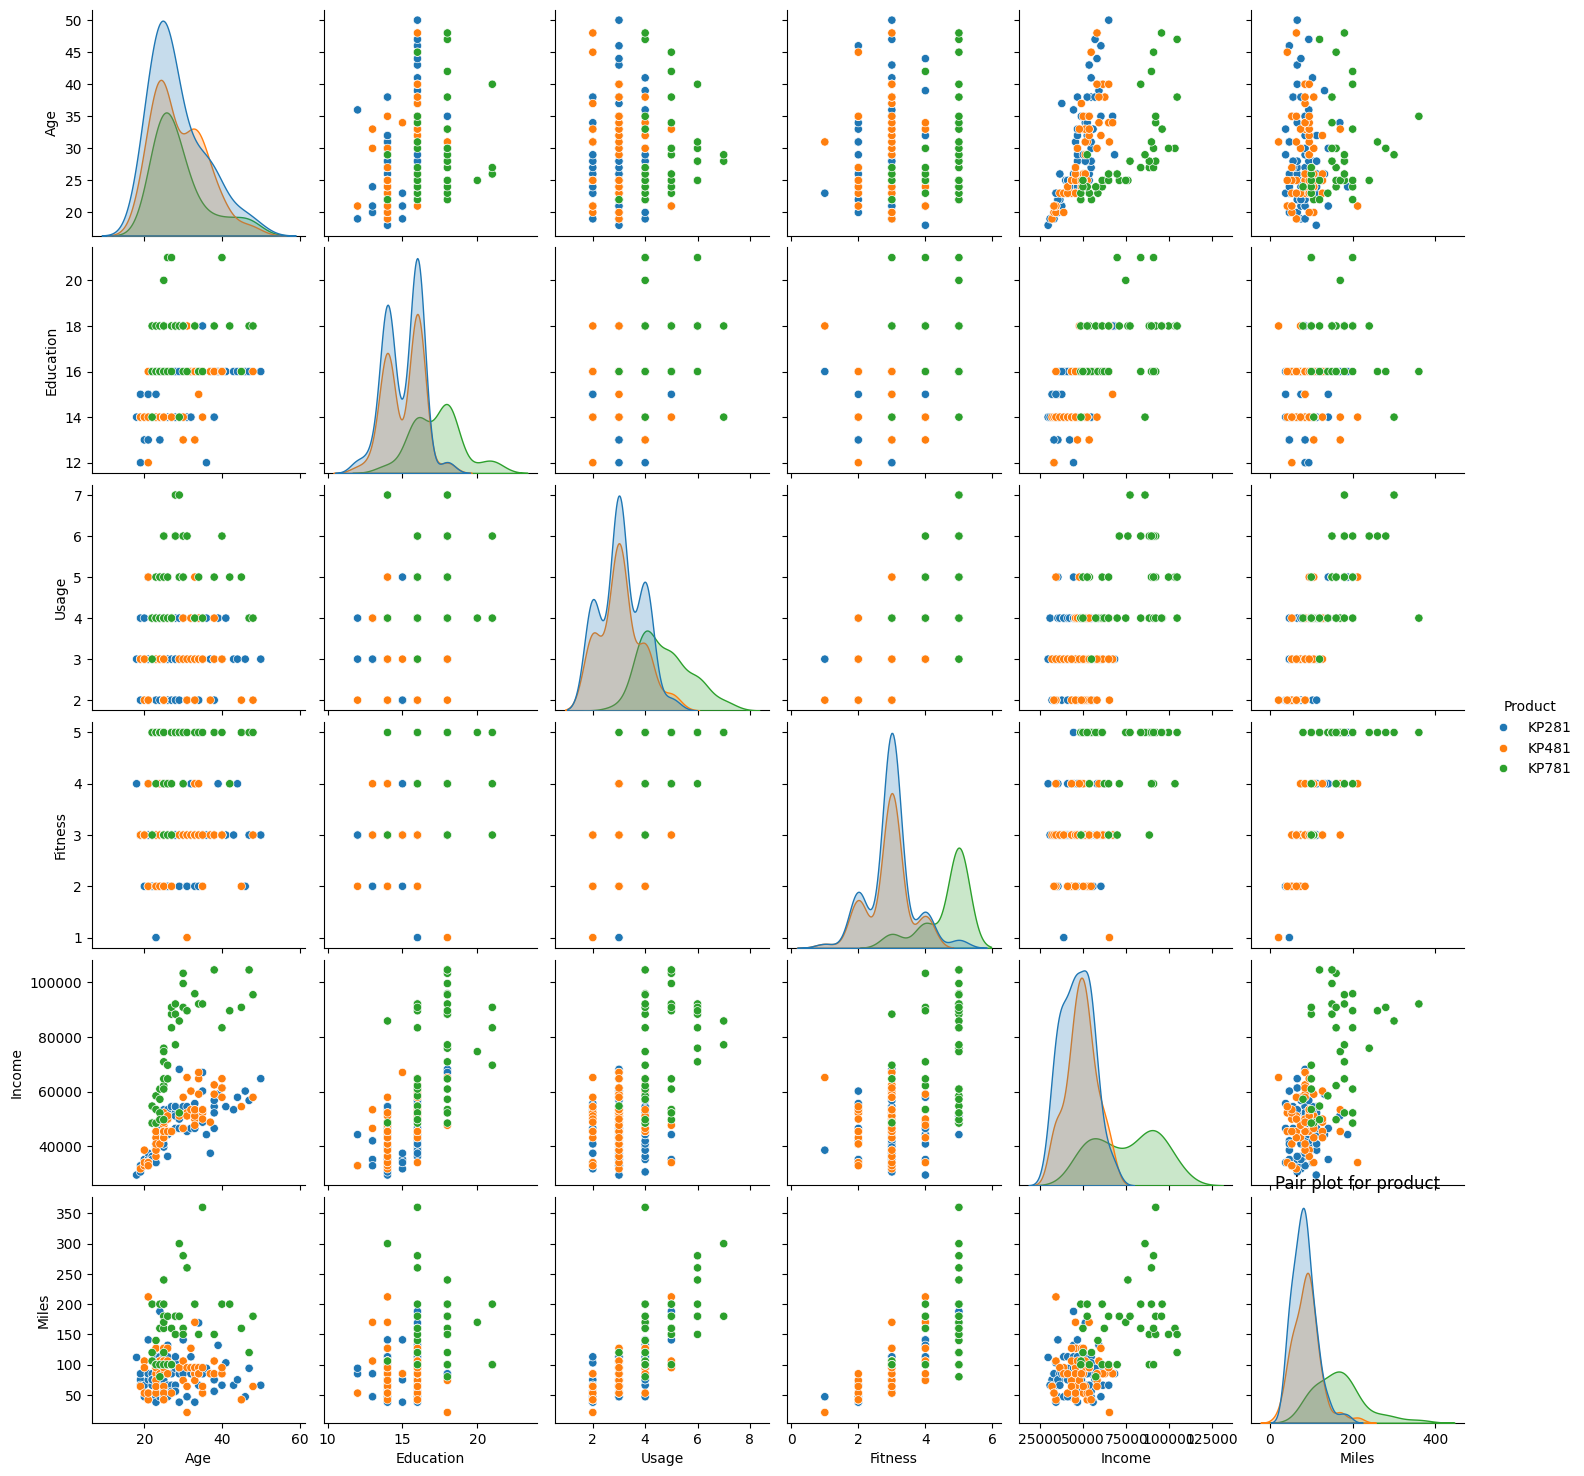

In [49]:
sns.pairplot(df, vars= ['Age','Education','Usage','Fitness', 'Income', 'Miles'], hue="Product")
plt.title( "Pair plot for product")
plt.show()

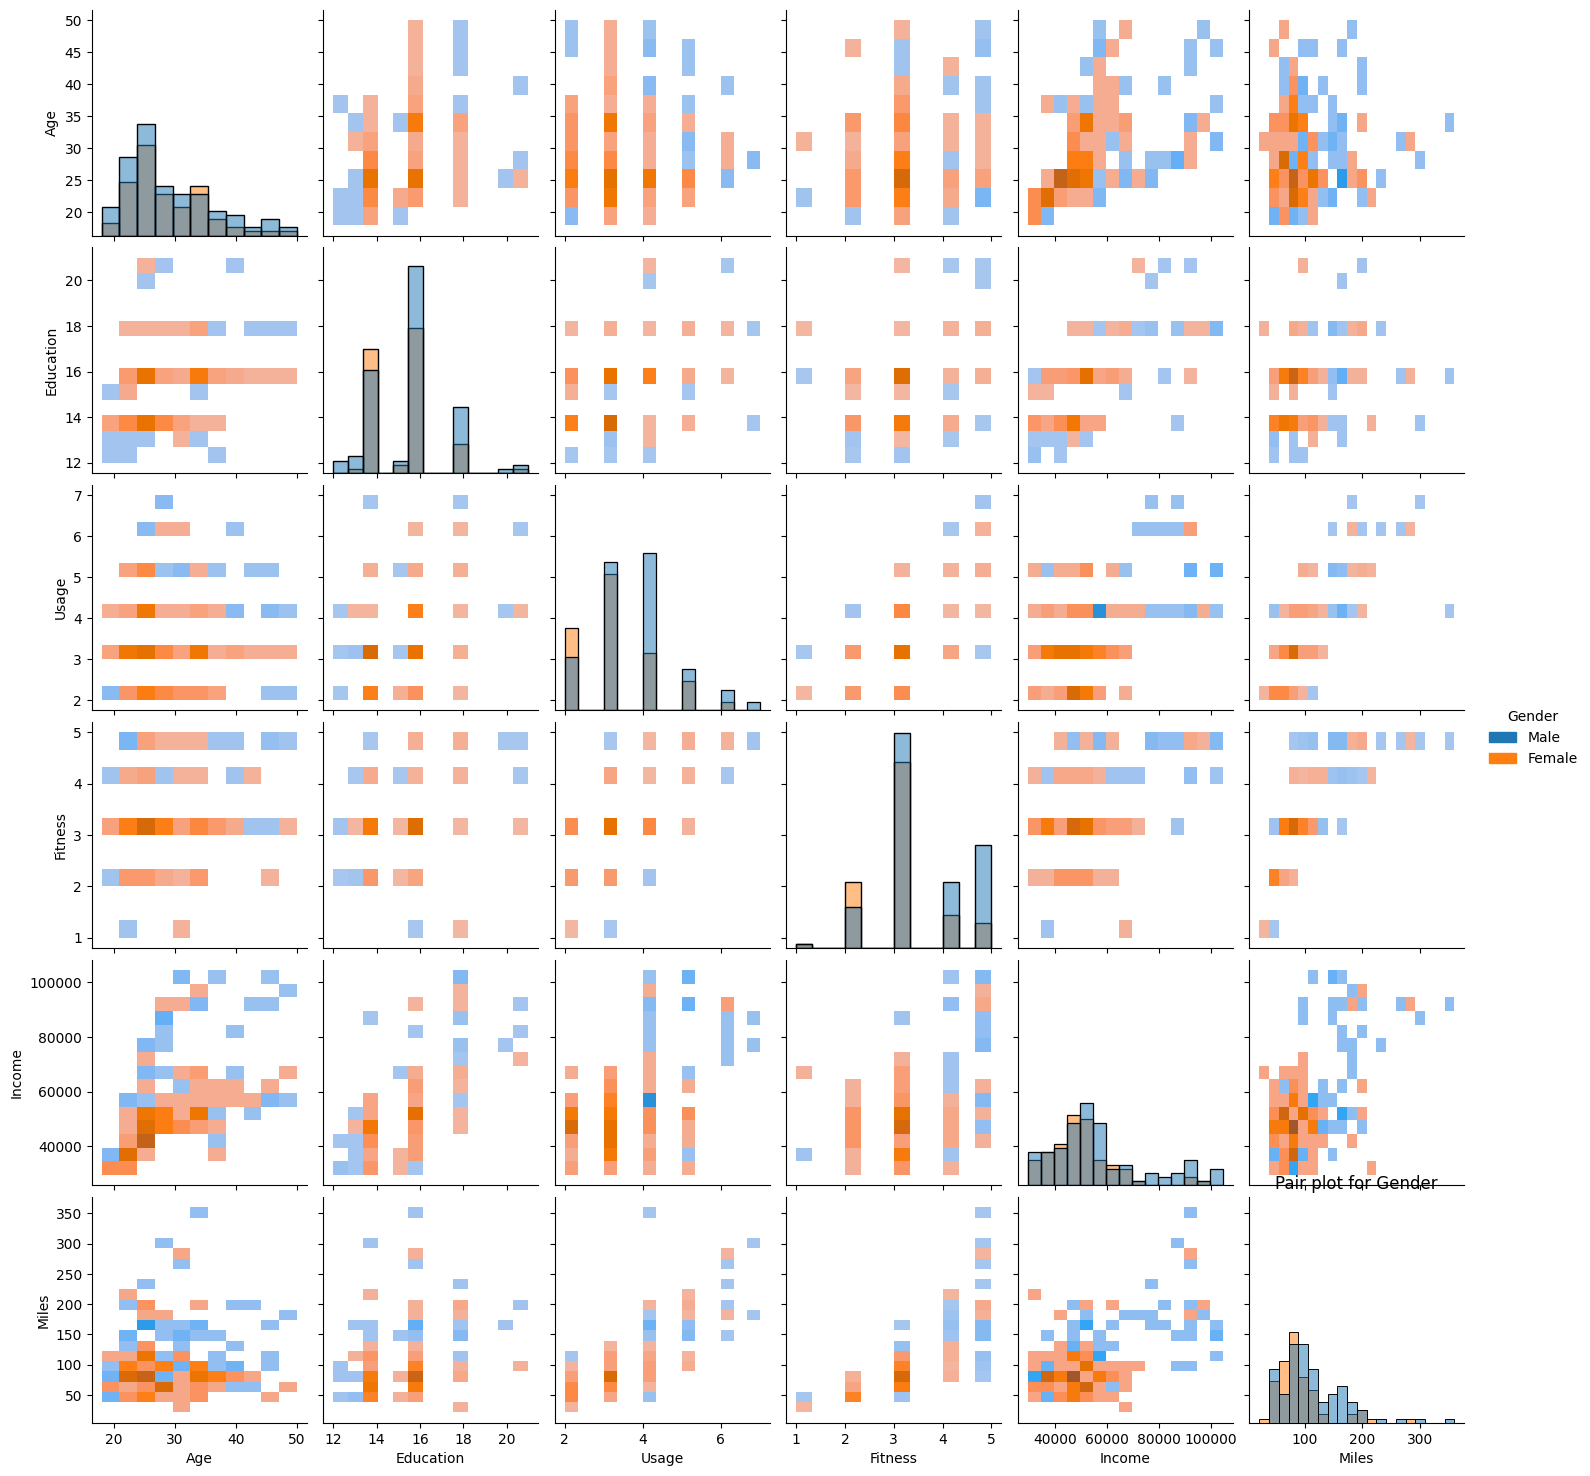

In [47]:
sns.pairplot(df, vars= ['Age','Education','Usage','Fitness', 'Income', 'Miles'],hue="Gender")
plt.title("Pair plot for Gender")
plt.show()

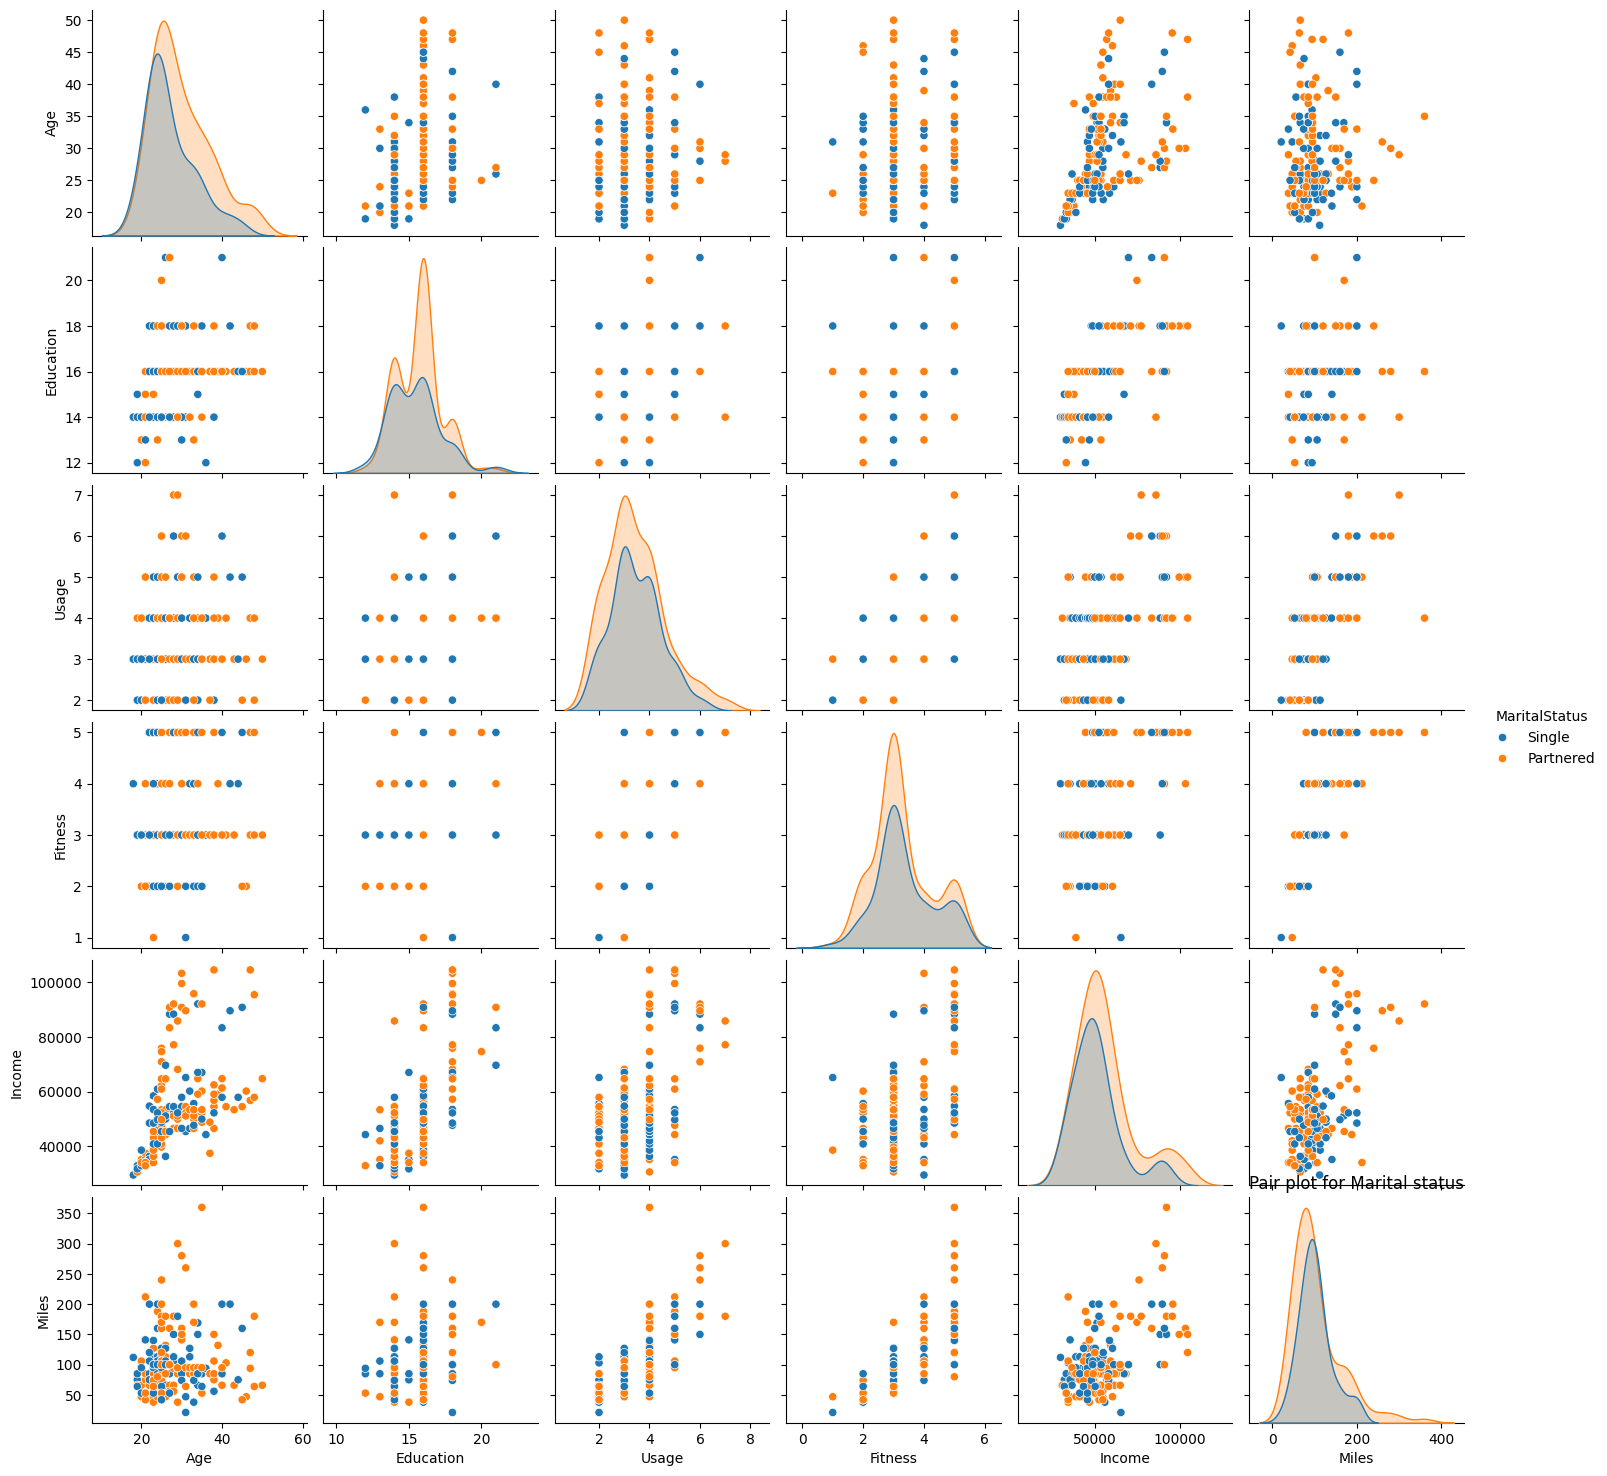

In [46]:
sns.pairplot(df, vars= ['Age','Education','Usage','Fitness', 'Income', 'Miles'],hue="MaritalStatus")
plt.title("Pair plot for Marital status")
plt.show()

In [53]:
Total_male_customer =df[ df['Gender'] == 'Male' ]
print(len(Total_male_customer))
Total_male_customer.head()

104


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
7,KP281,21,Male,13,Single,3,3,32973,85


In [59]:
Male_customer_buying_KP781 = Total_male_customer[Total_male_customer['Product']== "KP781"]
print (len(Male_customer_buying_KP781))

33


In [64]:
probability_of_male_customer_buying_KP781 = (len(Male_customer_buying_KP781))/(len(Total_male_customer))
print(probability_of_male_customer_buying_KP781*100)

31.73076923076923


In [1]:
#Probability

In [16]:
#Probability of Product(KP281) sales
print( round(len(df[df['Product']=="KP281"])*100/len(df),2), "%")

44.44 %


In [17]:
#Probability of Product(KP481) sales
print( round(len(df[df['Product']=="KP481"])*100/len(df),2), "%")

33.33 %


In [18]:
#Probability of Product(KP781) sales
print( round(len(df[df['Product']=="KP781"])*100/len(df),2), "%")

22.22 %


In [22]:
# Probability of purchase of "Product(KP281) and MaritalStatus(Single)"
print( round(len(df[(df['Product']=="KP281" ) & (df["MaritalStatus"]=="Single")])*100/len(df),2), "%")

17.78 %


In [23]:
# Probability of purchase of "Product(KP481) and MaritalStatus(Single)"
print( round(len(df[(df['Product']=="KP481" ) & (df["MaritalStatus"]=="Single")])*100/len(df),2), "%")

13.33 %


In [24]:
# Probability of purchase of "Product(KP781) and MaritalStatus(Single)"
print( round(len(df[(df['Product']=="KP781" ) & (df["MaritalStatus"]=="Single")])*100/len(df),2), "%")

9.44 %


In [27]:
# Probability of purchase of "Product(KP281) and MaritalStatus(Married)"
print( round(len(df[(df['Product']=="KP281" ) & (df["MaritalStatus"]=="Partnered")])*100/len(df),2), "%")

26.67 %


In [28]:
# Probability of purchase of "Product(KP481) and MaritalStatus(Married)"
print( round(len(df[(df['Product']=="KP481" ) & (df["MaritalStatus"]=="Partnered")])*100/len(df),2), "%")

20.0 %


In [29]:
# Probability of purchase of "Product(KP781) and MaritalStatus(Married)"
print( round(len(df[(df['Product']=="KP781" ) & (df["MaritalStatus"]=="Partnered")])*100/len(df),2), "%")

12.78 %


In [30]:
#Probability of selling KP281 in Female
print( round(len(df[(df['Product']=="KP281" ) & (df["Gender"]=="Female")])*100/len(df[df['Gender']=="Female"]),2), "%")

52.63 %


In [31]:
#Probability of selling KP481 in Female
print( round(len(df[(df['Product']=="KP481" ) & (df["Gender"]=="Female")])*100/len(df[df['Gender']=="Male"]),2), "%")

31.73 %


In [33]:
#Probability of selling KP781 in Female
print( round(len(df[(df['Product']=="KP781" ) & (df["Gender"]=="Female")])*100/len(df[df['Gender']=="Male"]),2), "%")

6.73 %


In [34]:
#Probability of selling KP281 in Male
print( round(len(df[(df['Product']=="KP281" ) & (df["Gender"]=="Male")])*100/len(df[df['Gender']=="Male"]),2), "%")

38.46 %


In [38]:
#Probability of selling KP481 in Male
print( round(len(df[(df['Product']=="KP481" ) & (df["Gender"]=="Male")])*100/len(df[df['Gender']=="Male"]),2), "%")

29.81 %


In [36]:
#Probability of selling KP781 in Male
print( round(len(df[(df['Product']=="KP781" ) & (df["Gender"]=="Male")])*100/len(df[df['Gender']=="Male"]),2), "%")

31.73 %


#Business Insights and recommendations

1)

2) 

3)

4)